# Heart Disease Prediction using Logistic Regression

### Project Overview

This project will focus on predicting the presence of heart disease using annonymized patient data from [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease). The published dataset includes 13 attibutes related to patient health and a "target" variable indicating the presence of heart disease. The target is binary, where:

- 0 indicates no heart disease
- 1 indicates heart disease

We will apply Logistic Regression as a binary classification method to categorize patients into one of the two classes: disease or no disease.  

### Objectives
1. **Data Preparation:** Understand and preprocess the 13 attributes from the dataset to ensure they are suitable for model training.
2. **Model Development:** Implement Logistic Regression to classify patients based on their health attributes.
3. **Evaluation:** Assess the model's performance using appropriate metrics to ensure it accurately predicts the presence of heart disease.

### Methodology
1. **Data Cleaning:** Handle missing values, if any, and normalize or standardize features as necessary.
2. **Feature Selection:** Determine the most relevant features for predicting heart disease.
3. **Model Training:** Train the Logistic Regression model using the prepared dataset.
4. **Model Testing:** Validate the model using a separate test set to gauge its predictive power.
5. **Performance Metrics:** Use metrics such as accuracy, precision, recall, and the ROC-AUC score to evaluate the model.

### Expected Outcome
A Logistic Regression model capable of effectively predicting heart disease based on patient health attributes, providing valuable insights for healthcare professionals in identifying at-risk individuals.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 


heart_disease.variables


,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [3]:
# remove observations with missing values 

index_to_drop = X.index[X.isna().any(axis=1)].tolist()

X = X.drop(labels=index_to_drop)
y = y.drop(labels=index_to_drop)
  

In [4]:
print(X.shape)
print(y.shape)

(297, 13)
(297, 1)


In [5]:
print(y.value_counts() ) 

num
0      160
1       54
2       35
3       35
4       13
dtype: int64


In [6]:
mapping = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}
y['num'] = y['num'].replace(mapping)

print(y.value_counts() ) 

num
0      160
1      137
dtype: int64


In [7]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [8]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


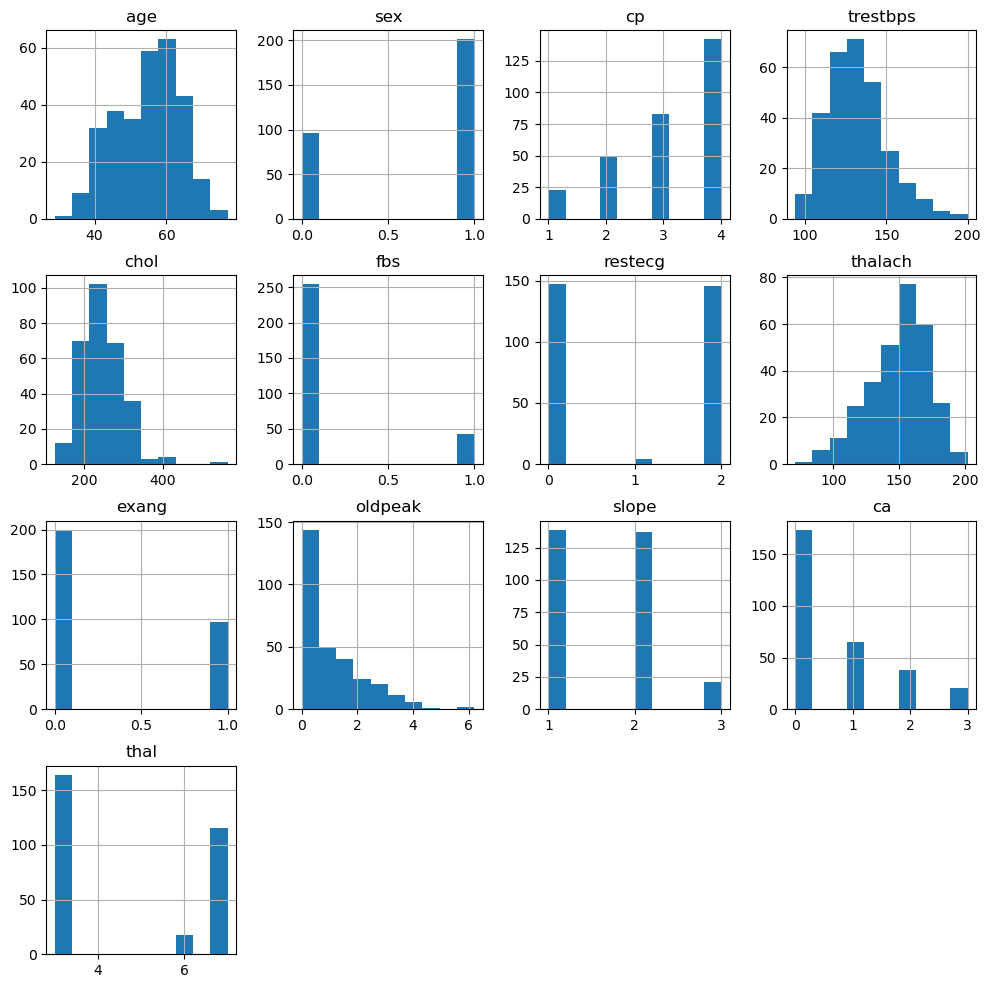

In [9]:
X.hist(figsize = (12, 12))
plt.show()

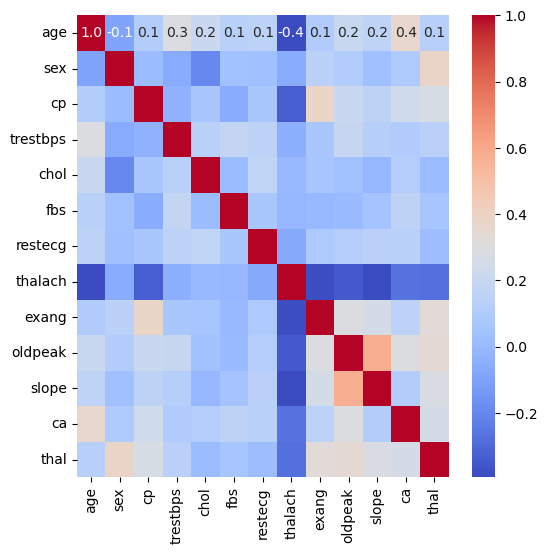

In [10]:
plt.figure(figsize=(6,6))
sns.heatmap(X.corr(),annot=True,fmt='.1f', cmap='coolwarm')
plt.show()

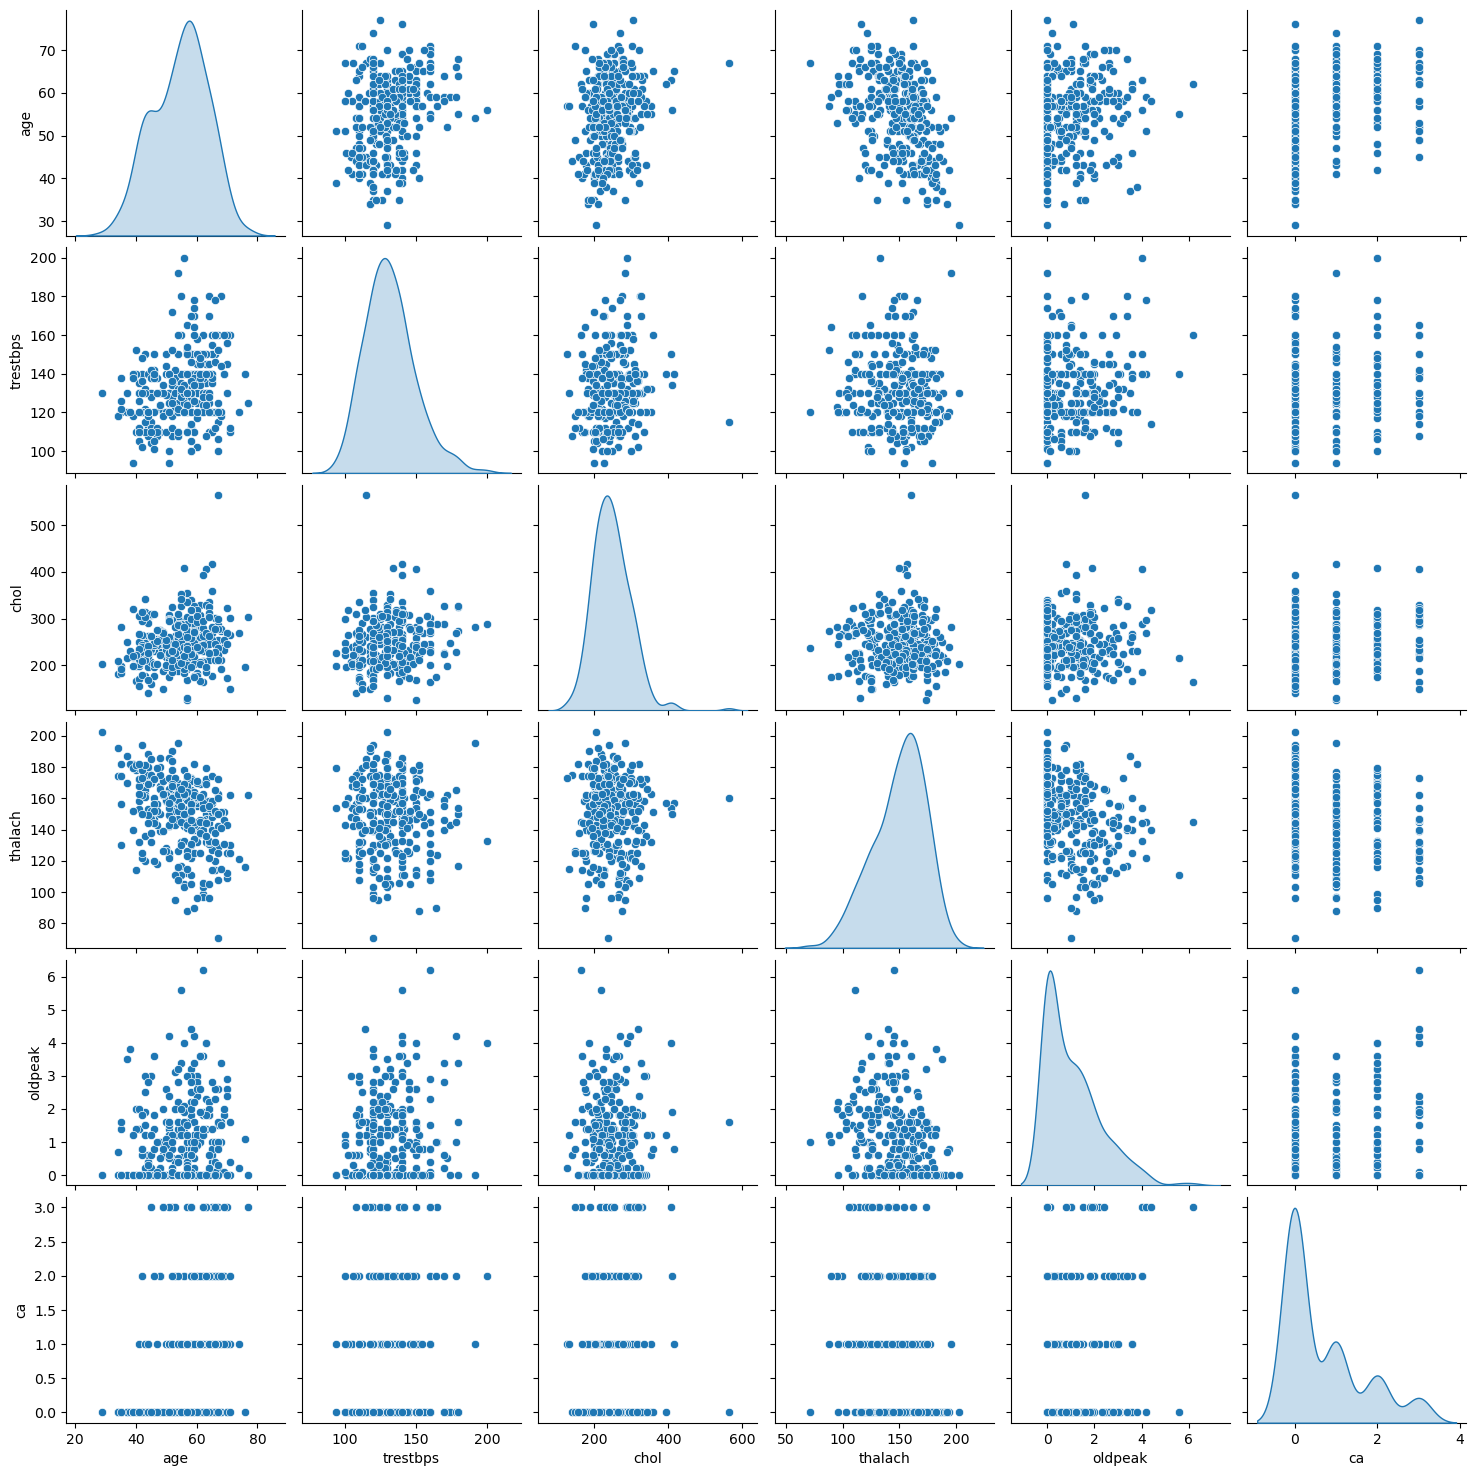

In [60]:
integer_idx = heart_disease.variables.index[heart_disease.variables['type'] == 'Integer']
integer_idx = integer_idx[:-1]
integers = X[X.columns[integer_idx]]


sns.pairplot(integers, diag_kind = 'kde')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

y_train = y_train['num'].squeeze()
y_test = y_test['num'].squeeze()

In [16]:
print("X train:", X_train.shape)
print("X test:", X_test.shape)
print("y train:", y_train.shape)
print("y test:", y_test.shape)

X train: (207, 13)
X test: (90, 13)
y train: (207,)
y test: (90,)


In [17]:
def gen_logistic(x, w=1, b=0):
    """
    outputing the logistic output for an input x
    :param x: scalar or numpy array of shape (n_samples, n_features). If only one feature, it must have the shape of (n_samples,1).
    :param w: weight(s); either scalar or numpy array of shape (1, n_features)
    :param b: bias; either scalar or numpy array of shape (1,)
    returns y of shape (n_samples,)
    """    
    
    y =0 
    if np.isscalar(x):
      x = np.array(x).reshape((1,1))
    if np.isscalar(w):
      w = np.array(w).reshape((1,1))
    if np.isscalar(b):
      b = np.array(b).reshape((1,1))  
    if b.shape==(1,):
      b= b.reshape((1,1))  

    
    x = np.matrix(x)
    w = np.transpose(w)
    
    #z = np.dot(x, w.T) + b           
    z = x@w + b

    y = 1 / (1 + np.exp(-z))
    
    y = np.array(y)
 
    return y.reshape(y.shape[0],)


def calculate_precision(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates precision for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    from sklearn.metrics import confusion_matrix
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    precision = tp/(tp + fp )
    
    return precision

def calculate_recall(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates recall for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    
    from sklearn.metrics import confusion_matrix
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    recall = tp/(tp + fn )
    
    return recall

### Build Base model 

In [48]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

#### Training Performance 

0.9106606606606605


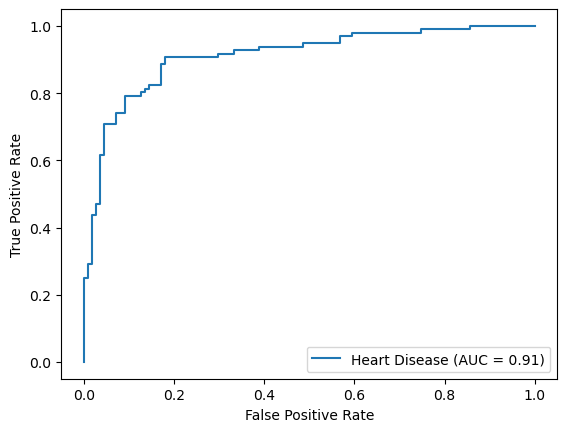

In [19]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_true = y_train
y_score = LogReg.predict_proba(X_train)[:, 1] #probabilies for positive class

roc_auc = roc_auc_score(y_true, y_score)

fpr, tpr, thresholds = roc_curve(y_true, y_score)

roc_display = metrics.RocCurveDisplay(fpr=fpr, 
                                      tpr=tpr, 
                                      roc_auc=roc_auc,
                                      estimator_name='Heart Disease').plot()


print(roc_auc)

#### Testing Performance 

x = X_test 
w = LogReg.coef_
b = LogReg.intercept_

y_pred = gen_logistic(x, w, b)


y_pred = (y_pred >= 0.5).astype(int)  #convert into binaries 

precision = calculate_precision(y_test, y_pred)
recall = calculate_recall(y_test, y_pred)

print('Model Precision : %0.2f' % precision)
print('Model Recall : %0.2f' % recall)

### Feature Selection with RFE

In [49]:
from sklearn.feature_selection import RFE

LogReg = LogisticRegression(solver='liblinear')

rfe = RFE(estimator=LogReg, step=1)
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(solver='liblinear'))

In [50]:
# Get a mask of the selected features
selected_features = rfe.support_

# Get names of the selected features
best_features = []

for feature, selected in zip(X_train.columns, selected_features):
     if selected:
            best_features.append(feature)
            
best_features

['sex', 'fbs', 'exang', 'oldpeak', 'ca', 'thal']

In [51]:
LogReg = LogisticRegression(solver='liblinear').fit(X_train[best_features], y_train)

#### Training Performance 

0.8971471471471472


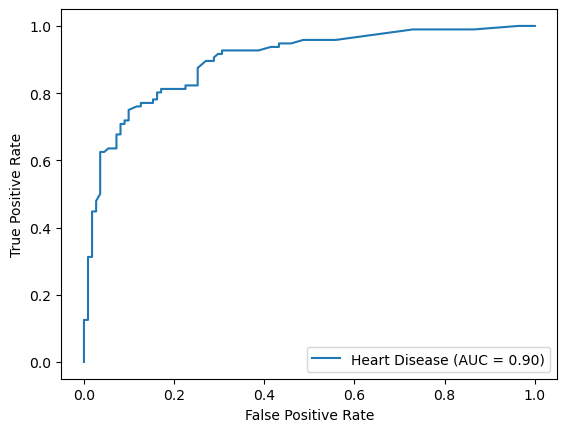

In [52]:
y_true = y_train
y_score = LogReg.predict_proba(X_train[best_features])[:, 1] #probabilies for positive class

roc_auc = roc_auc_score(y_true, y_score)

fpr, tpr, thresholds = roc_curve(y_true, y_score)

roc_display = metrics.RocCurveDisplay(fpr=fpr, 
                                      tpr=tpr, 
                                      roc_auc=roc_auc,
                                      estimator_name='Heart Disease').plot()


print(roc_auc)

In [ ]:
#### Training Performance 

In [53]:
x = X_test[best_features] 
w = LogReg.coef_
b = LogReg.intercept_

y_pred = gen_logistic(x, w, b)


y_pred = (y_pred >= 0.5).astype(int)  #convert into binaries 

precision = calculate_precision(y_test, y_pred)
recall = calculate_recall(y_test, y_pred)

print('Model Precision : %0.2f' % precision)
print('Model Recall : %0.2f' % recall)

Model Precision : 0.84
Model Recall : 0.78


### Feature Selection with RFECV 

In [54]:

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(solver='liblinear')

rfecv = RFECV(estimator=LogReg, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=LogisticRegression(solver='liblinear'),
      scoring='accuracy')

Optimal number of features: 12


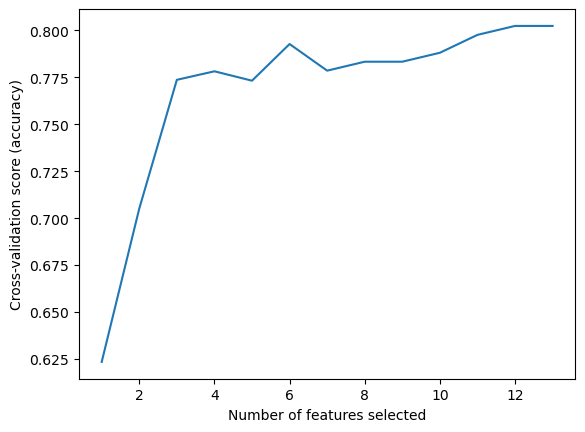

In [55]:
# Get the optimal number of features
optimal_features = rfecv.n_features_

print(f"Optimal number of features: {optimal_features}")

# Plot number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")

# Use mean test score from cv_results_ to plot the performance
mean_test_scores = rfecv.cv_results_['mean_test_score']
plt.plot(range(1, len(mean_test_scores) + 1), mean_test_scores)
plt.show()


In [56]:
# Get a mask of the selected features
selected_features = rfecv.support_

# Get names of the selected features
best_features = []

for feature, selected in zip(X_train.columns, selected_features):
     if selected:
            best_features.append(feature)
            
best_features

['age',
 'sex',
 'cp',
 'trestbps',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [57]:
X_train_cv = X_train[best_features]

LogReg = LogisticRegression(solver='liblinear').fit(X_train_cv, y_train)

0.9085022522522522


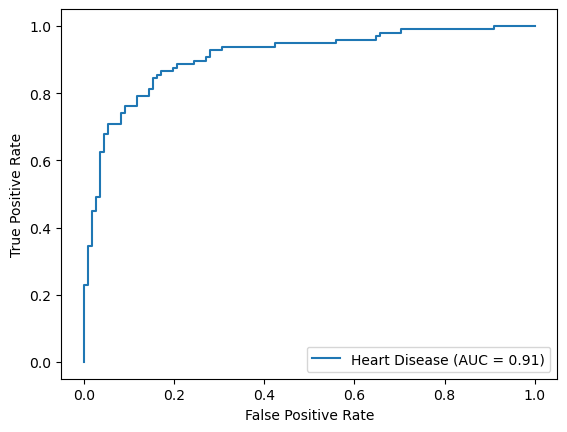

In [58]:
y_true = y_train
y_score = LogReg.predict_proba(X_train_cv)[:, 1] #probabilies for positive class

roc_auc = roc_auc_score(y_true, y_score)

fpr, tpr, thresholds = roc_curve(y_true, y_score)

roc_display = metrics.RocCurveDisplay(fpr=fpr, 
                                      tpr=tpr, 
                                      roc_auc=roc_auc,
                                      estimator_name='Heart Disease').plot()


print(roc_auc)

In [59]:
x = X_test[best_features] 
w = LogReg.coef_
b = LogReg.intercept_

y_pred = gen_logistic(x, w, b)


y_pred = (y_pred >= 0.5).astype(int)  #convert into binaries 

precision = calculate_precision(y_test, y_pred)
recall = calculate_recall(y_test, y_pred)

print('Model Precision : %0.2f' % precision)
print('Model Recall : %0.2f' % recall)

Model Precision : 0.92
Model Recall : 0.88


### Conclusion and Discussion 

The base logistic regression model achieved a precision of 0.88 and a recall of 0.85, indicating relatively decent performance. However, with an AUC value of 0.90, the model fits the training data better than the test data, suggesting potential overfitting.

Feature selection was tested using Recursive Feature Elimination (RFE) and RFE with Cross-Validation (RFECV). RFE iteratively removes the least significant features, assigning ranks based on their importance, where higher ranking values denote lower importance. The recommended number of features using RFE was 6. However, this selection worsened model performance, with precision dropping to 0.84 and recall to 0.78.

In contrast, RFECV, which integrates cross-validation to improve feature selection, suggested using 12 features. This resulted in a better model performance with a precision of 0.92 and a recall of 0.88. Notably, RFECV excluded the "cholesterol" attribute from the training dataset. Analyzing cross-validation results indicated that model accuracy peaked with 6 features, despite poorer overall performance metrics. Perhaps the exclusion of the cholesterol attribute may be due to the lack of additional preprocessing, which likely affected its predictive value. For better performance, it may have been necessary to transform the data further.

Future work should consider preprocessing strategies to better handle features like cholesterol, ensuring they contribute meaningfully to model performance. The findings show how to use feature selection to achieve optimal predictive accuracy in logistic regression models.